<a href="https://colab.research.google.com/github/srivatsalnarayan/TD-ML-Projects/blob/main/srivatsal_narayan_terrorist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from ipywidgets import interact, interact_manual

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/terrorist/terrorist.csv", encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(181691, 135)

In [ ]:
df_raw = df.copy()
df=df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','targtype1_txt','gname','weaptype1_txt']]
df.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Government (Diplomatic),Unknown,Incendiary


In [ ]:
df.isna().mean().round(4)*100

iyear            0.00
imonth           0.00
iday             0.00
extended         0.00
country_txt      0.00
region_txt       0.00
city             0.24
success          0.00
suicide          0.00
targtype1_txt    0.00
gname            0.00
weaptype1_txt    0.00
dtype: float64

In [ ]:
#is's not correct to impute missing city name . So let's drop
df.dropna(axis=0,how='any',inplace=True)

In [ ]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','gname':'group','weaptype1_txt':'weapon'}, inplace=True)

In [ ]:
df.head(10)

,year,month,day,extended,country,region,city,success,suicide,targtype1_txt,group,weapon
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Government (Diplomatic),Unknown,Incendiary
5,1970,1,1,0,United States,North America,Cairo,1,0,Police,Black Nationalists,Firearms
6,1970,1,2,0,Uruguay,South America,Montevideo,0,0,Police,Tupamaros (Uruguay),Firearms
7,1970,1,2,0,United States,North America,Oakland,1,0,Utilities,Unknown,Explosives
8,1970,1,2,0,United States,North America,Madison,1,0,Military,New Year's Gang,Incendiary
9,1970,1,3,0,United States,North America,Madison,1,0,Government (General),New Year's Gang,Incendiary


In [ ]:
df.describe()

,year,month,day,extended,success,suicide
count,181257.000000,181257.000000,181257.000000,181257.000000,181257.000000,181257.000000
mean,2002.624599,6.466779,15.504665,0.045328,0.889488,0.036550
std,13.271843,3.388787,8.814744,0.208023,0.313527,0.187655
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000


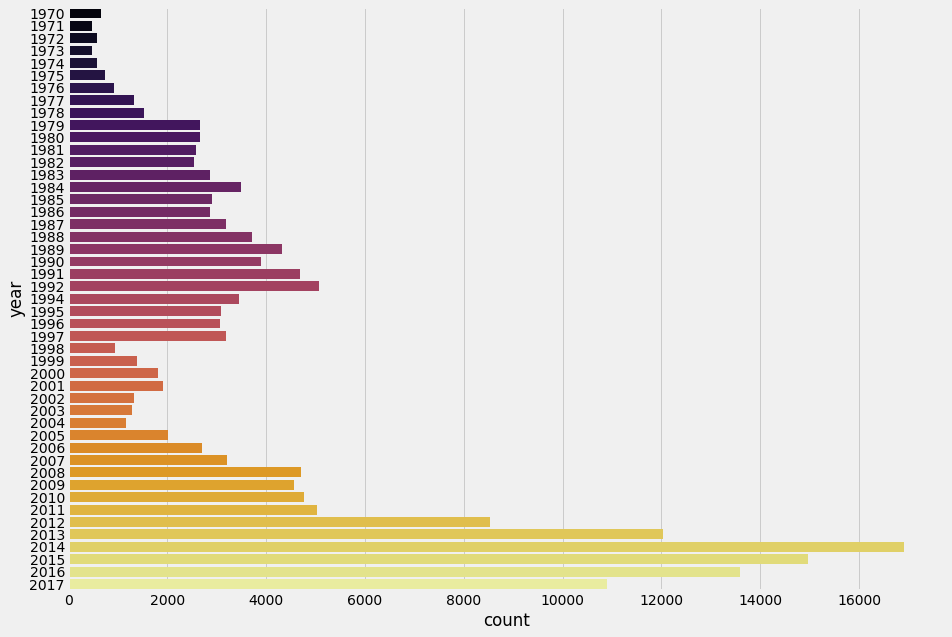

In [ ]:
plt.rcParams['figure.figsize']=14,10
sns.countplot(y=df['year'],palette='inferno')
plt.show()

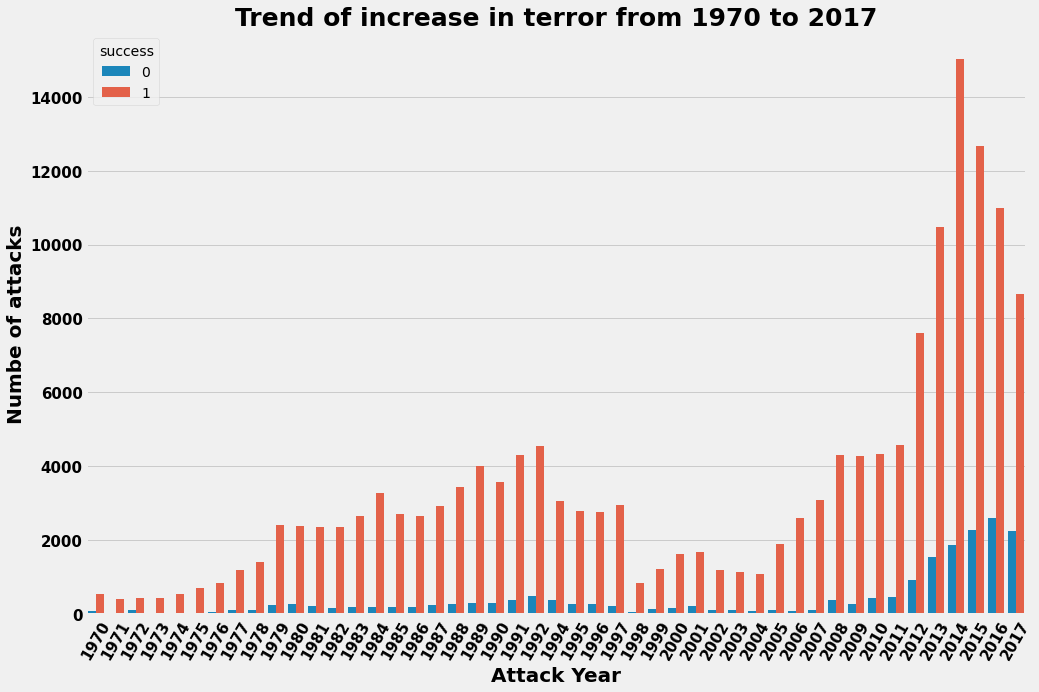

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x='year',hue='success',data=df)
plt.xlabel('Attack Year',fontsize=20, fontweight='bold')
plt.ylabel('Numbe of attacks',fontsize=20, fontweight='bold')
plt.title('Trend of increase in terror from 1970 to 2017',fontsize=25, fontweight='bold')
plt.xticks(rotation=60,fontsize=15, fontweight='bold')
plt.yticks(size=15, fontweight='bold')
plt.show()

In [ ]:
#which region is affected by terrorists in each year
@interact

def attack_year(year=list(df['year'].unique())):
  a = df[df['year']==year]
  return sns.countplot(y=a['region'],palette='viridis')

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

In [ ]:
# which countries are affected most from each region
@interact

def country_name(region=list(df['region'].unique())):
  a = df[df['region']==region]
  return sns.countplot(y=a['country'],palette='viridis')
  return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

In [ ]:
#cities attacked most in each countries 
@interact

def city_name(country=list(df['country'].unique())):
  a = df[df['country']==country]
  a=pd.DataFrame(a['city'].value_counts())
  return a.style.background_gradient(cmap='plasma')

,city
Dublin,121
Limerick,11
Dundalk,11
Cork,10
Drogheda,10
Tallaght,6
Castleblayney,5
Louth,4
Blarney,3
Athy,3


In [ ]:
# what kind of weapons were used 
@interact

def weapon_type(country=list(df['country'].unique())):
  a = df[df['country']==country]
  a=pd.DataFrame(a['weapon'].value_counts())
  return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='country', options=('Dominican Republic', 'Mexico', 'Philippines', …

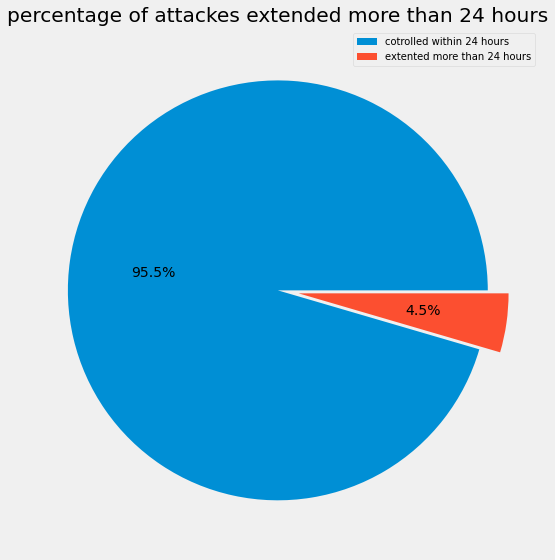

In [ ]:
plt.rcParams['figure.figsize']=(9,9)
explode = (0,0.1)
labels=['cotrolled within 24 hours','extented more than 24 hours']
plt.pie(df['extended'].value_counts(),explode=explode, autopct='%1.1f%%')
plt.title('percentage of attackes extended more than 24 hours')
plt.legend(labels,fontsize=10)
plt.show()

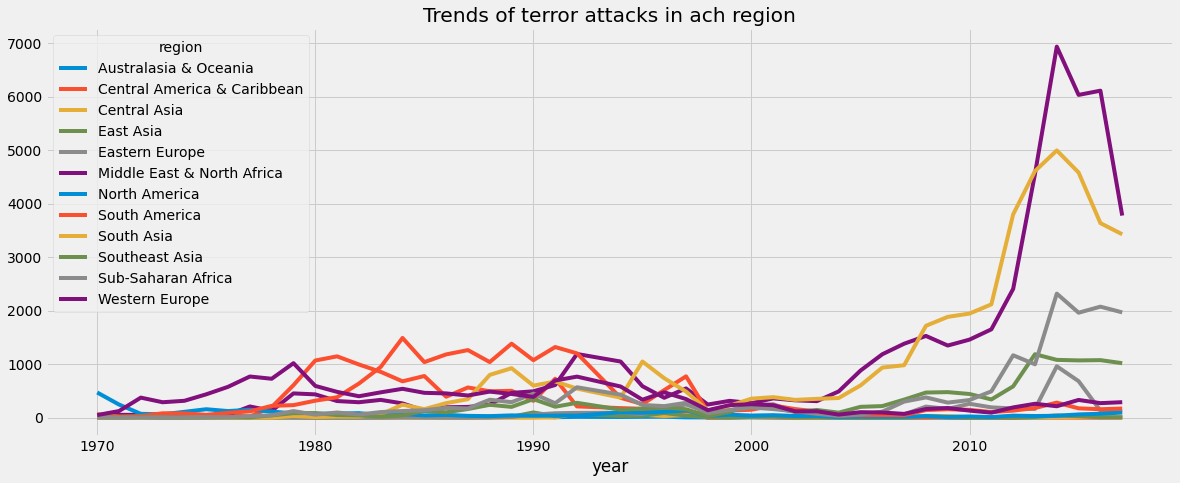

In [ ]:
plt.rcParams['figure.figsize']=(18,7)
explode = (0,0.1)
terror_area=pd.crosstab(df.year,df.region)
terror_area.plot()
plt.title('Trends of terror attacks in ach region')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa8160f810>,
      dtype=object)

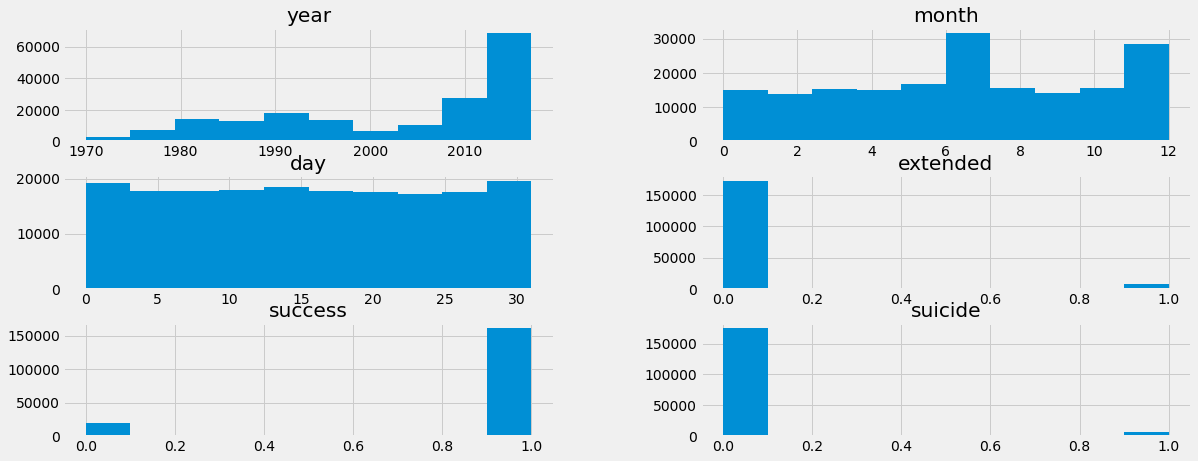

In [ ]:
plt.figure

df.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

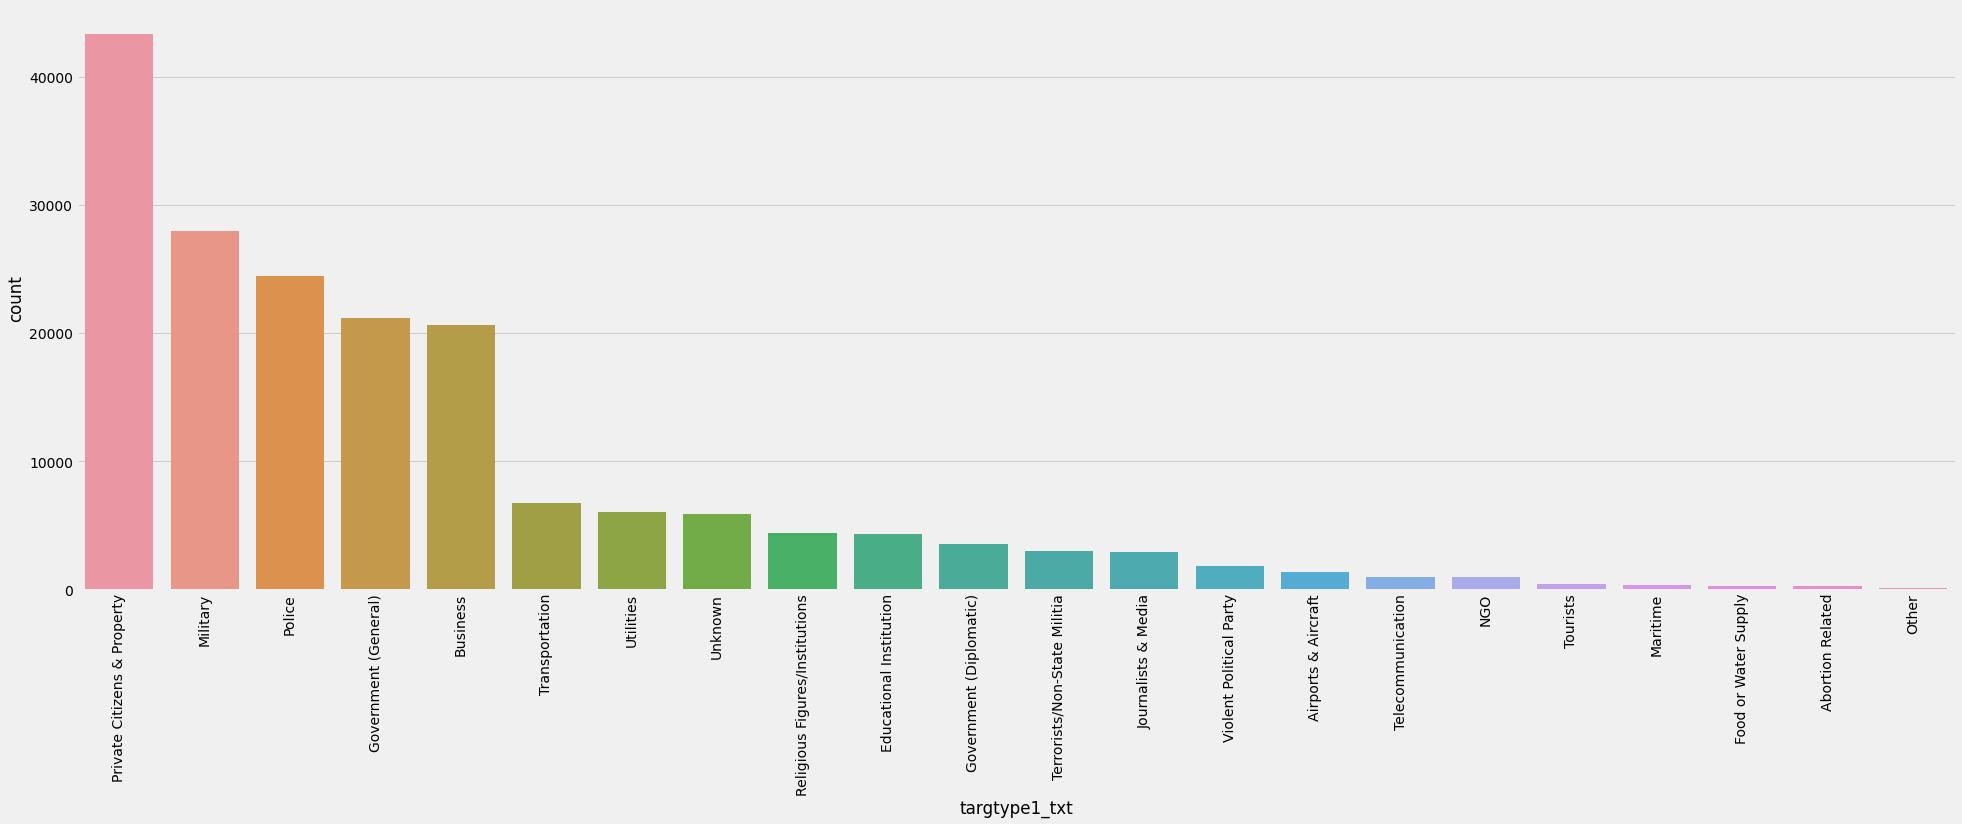

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(df['targtype1_txt'],order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)

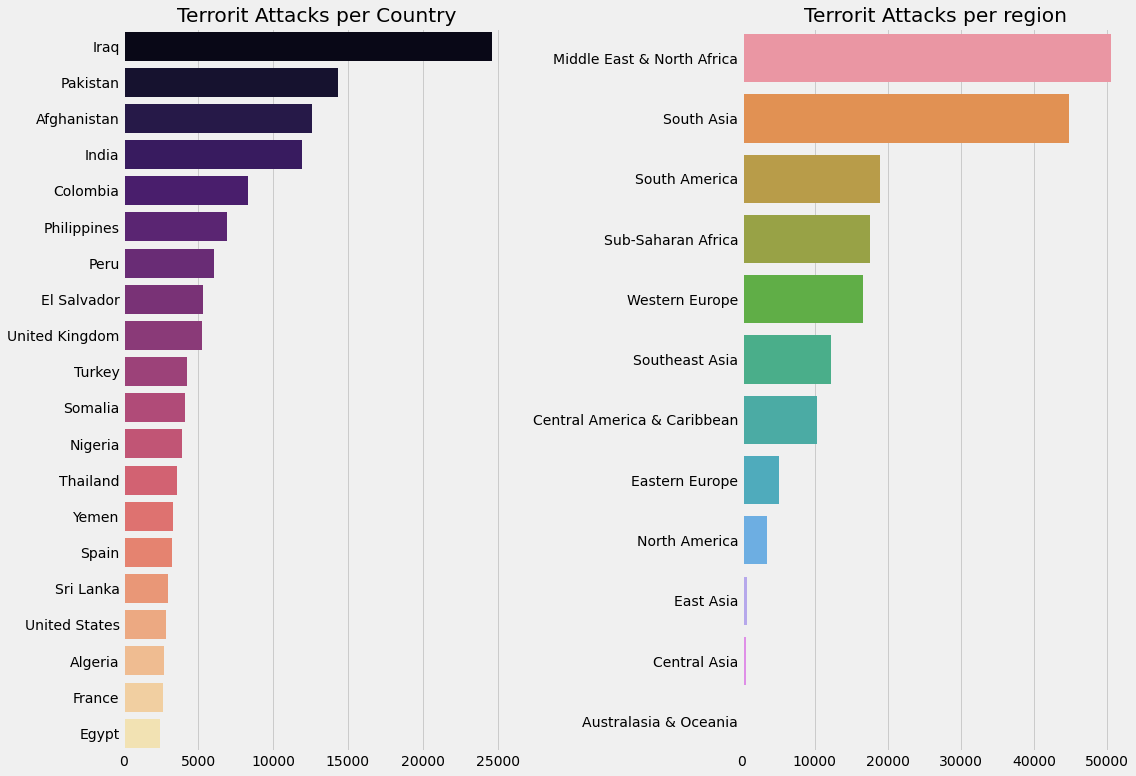

In [ ]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x=df['country'].value_counts()[:20].values,y=df['country'].value_counts()[:20].index,ax=axes[0],palette='magma');
axes[0].set_title("Terrorit Attacks per Country")
sns.barplot(x=df['region'].value_counts().values,y=df['region'].value_counts().index,ax=axes[1])
axes[1].set_title("Terrorit Attacks per region")
fig.tight_layout()
plt.show()



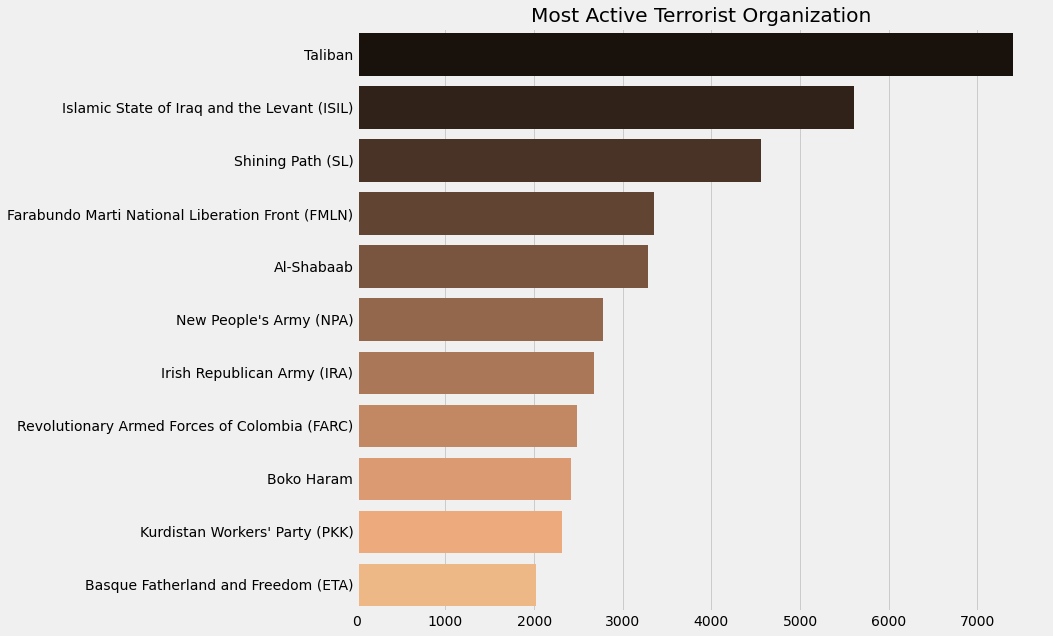

In [ ]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['group'].value_counts()[1:12].index,x=df['group'].value_counts()[1:12].values,palette='copper')
plt.title("Most Active Terrorist Organization")
plt.show()

Analysing Before and After The War


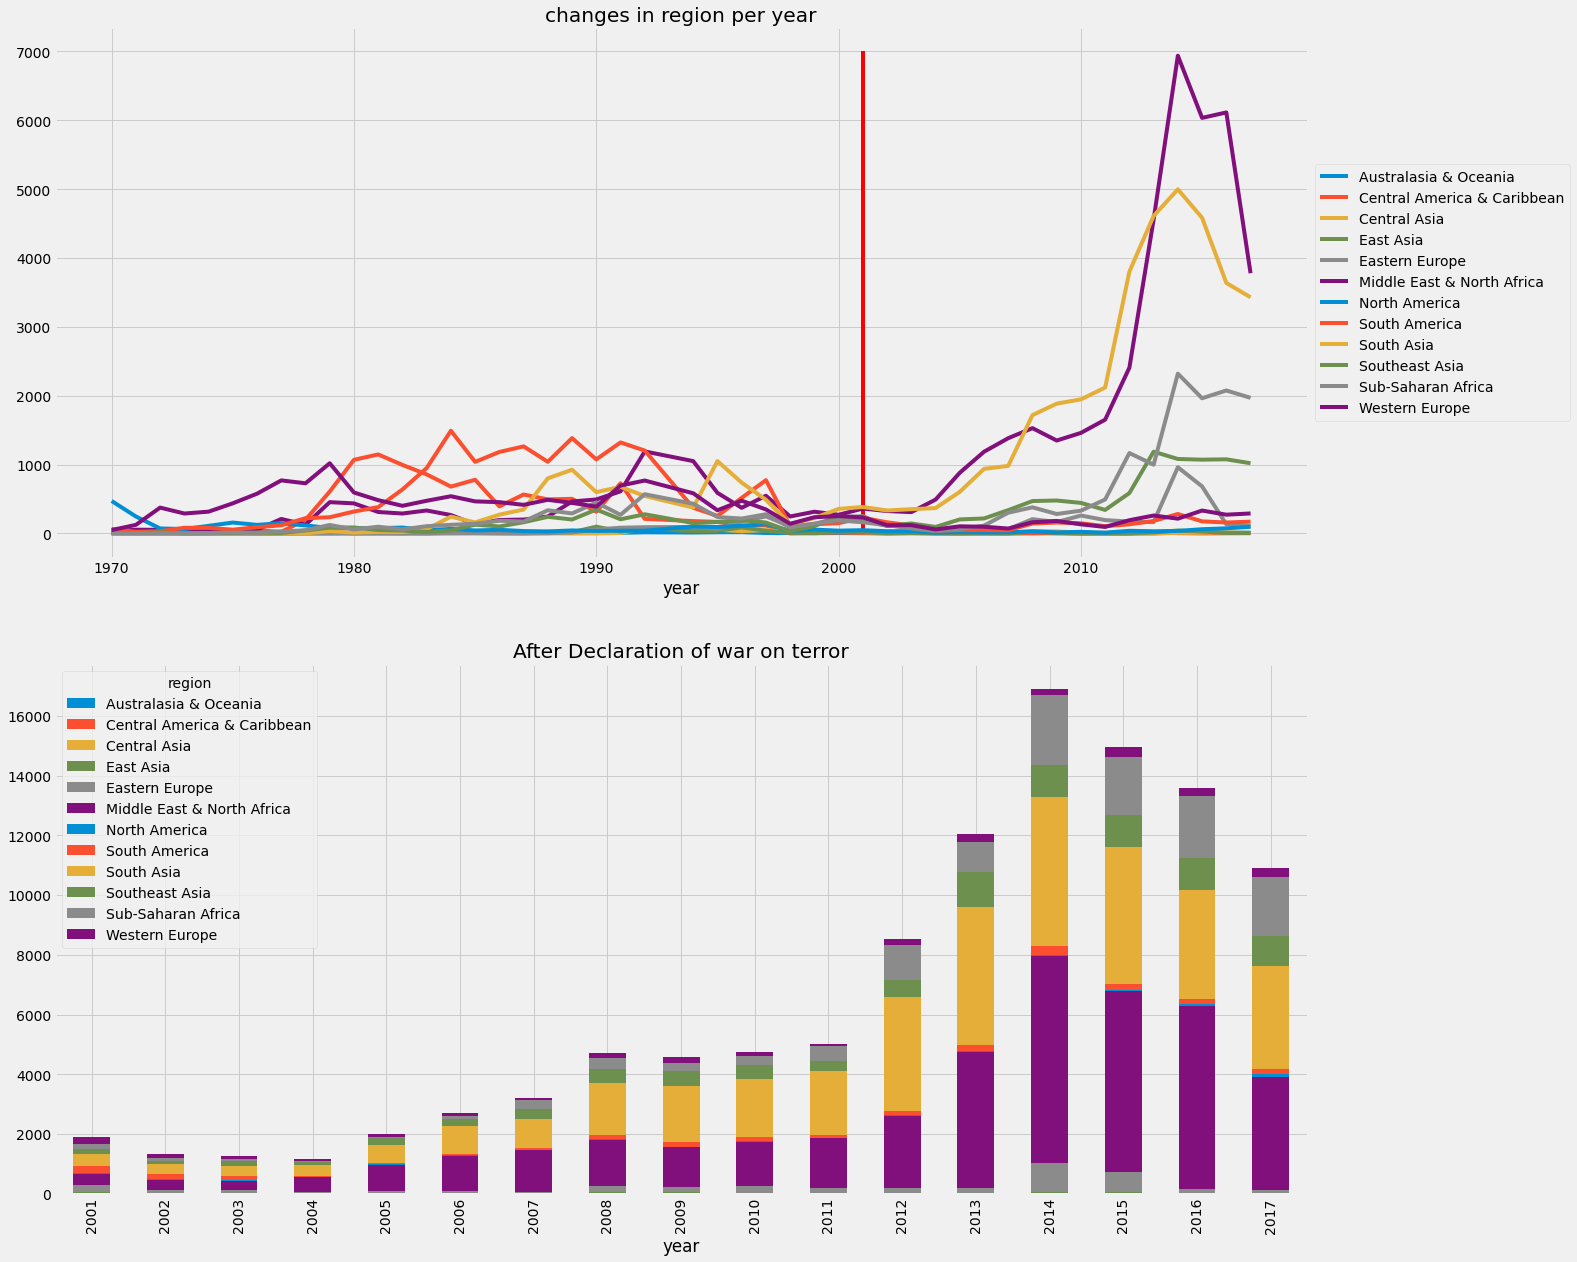

In [ ]:
data_after=df[df['year']>=2001]
fig,ax=plt.subplots(figsize=(20,20),nrows=2,ncols=1)
ax[0]=pd.crosstab(df.year,df.region).plot(ax=ax[0])
ax[0].set_title('changes in region per year')
ax[0].legend(loc='center left',bbox_to_anchor=(1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red')
pd.crosstab(data_after.year,data_after.region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of war on terror')
ax[0].legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

In [ ]:
print('Country with highest Terrorist Attack',df['country'].value_counts().index[0])
print('Regions with highest Terrorist Attack',df['region'].value_counts().index[0])


Country with highest Terrorist Attack Iraq
Regions with highest Terrorist Attack Middle East & North Africa
